In [177]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import tree
import matplotlib.pyplot as plt

In [178]:
titanic_df = pd.read_csv("titanic.csv")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [179]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [180]:
# You can also drop whichever other columns you'd like here
titanic_df.drop("Cabin", axis=1, inplace=True)
titanic_df.drop("Name", axis=1, inplace=True)
titanic_df.drop("Ticket", axis=1, inplace=True)
titanic_df.drop("PassengerId", axis=1, inplace=True)

### One-Hot Encoding
One-hot encoding is a technique used to ensure that categorical variables are better represented in the machine. Let's take a look at the "Sex" column

In [181]:
titanic_df["Sex"].unique()

array(['male', 'female'], dtype=object)

Machine Learning classifiers don't know how to handle strings. As a result, you need to convert it into a categorical representation. There are two main ways to go about this:

Label Encoding: Assigning, for example, 0 for "male" and 1 for "female". The problem here is it intrinsically makes one category "larger than" the other category.

One-hot encoding: Assigning, for example, [1, 0] for "male" and [0, 1] for female. In this case, you have an array of size (n_categories,) and you represent a 1 in the correct index, and 0 elsewhere. In Pandas, this would show as extra columns. For example, rather than having a "Sex" column, it would be a "Sex_male" and "Sex_female" column. Then, if the person is male, it would simply show as a 1 in the "Sex_male" column and a 0 in the "Sex_female" column.

There is a nice and easy method that does this in pandas: get_dummies()

In [182]:
titanic_df = pd.get_dummies(titanic_df, prefix="Sex", columns=["Sex"])
titanic_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male
0,0,3,22.0,1,0,7.2500,S,0,1
1,1,1,38.0,1,0,71.2833,C,1,0
2,1,3,26.0,0,0,7.9250,S,1,0
3,1,1,35.0,1,0,53.1000,S,1,0
4,0,3,35.0,0,0,8.0500,S,0,1


Now, we do the same to the "Embarked" column.

In [183]:
titanic_df = pd.get_dummies(titanic_df, prefix="Embarked", columns=["Embarked"])
titanic_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <BarContainer object of 10 artists>)

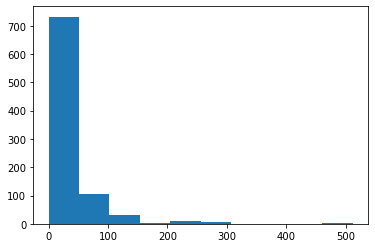

In [184]:
# Looking at the underlying distribution of the 'Fare' feature
# Before deciding on the scaling method
plt.hist(titanic_df["Fare"])

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

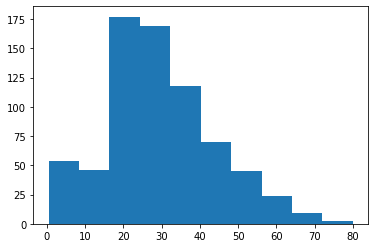

In [201]:
# Looking at the underlying distribution of the 'Age' feature
# Before deciding on filling the missing values and the scaling method
plt.hist(titanic_df["Age"])

In [214]:
# Deciding on filling the missing data points in 'Age' column with mode values
# Since this method had less impact on the underlying distribution 
mode_value = titanic_df['Age'].mode()[0]
titanic_df['Age_filled'] = titanic_df['Age'].fillna(mode_value)
titanic_df['Age_filled'].isna().sum()

0

(array([ 54.,  46., 354., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

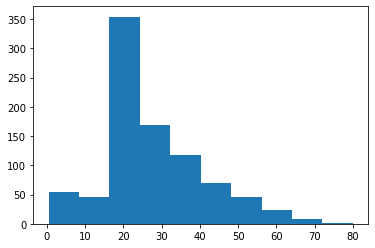

In [215]:
# The underlying distribution of the 'Age' column after filling the nan values
plt.hist(titanic_df["Age_filled"])

In [197]:
# Replacing the nan values with the mode values
mode_value = titanic_df['Age'].mode()[0]
titanic_df['Age'].fillna(mode_value, inplace=True)
titanic_df.drop("Age_filled", axis=1, inplace=True)

In [217]:
# selecting relevant variables
# independent variables
# ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']
x = titanic_df.iloc[:, 1:10]
# dependent variable (only 'Survived')
y = titanic_df.iloc[:, 0]

In [218]:
# splitting data to training and test set
X_train_full, X_test, y_train_full, y_test = train_test_split(
    x, y, test_size=0.25, random_state=0
)

# splitting training set to training set and development set
X_train, X_dev, y_train, y_dev = train_test_split(
    X_train_full, y_train_full, test_size=0.25, random_state=0
)

In [220]:
# Scaling the 'Fare' column
# Using the Normalisation method 
# since the underlying distribution didn't follow normal distribution
sc = MinMaxScaler()

# First only fitting the training data to the scaler
Fare_transformed = sc.fit_transform(np.array(X_train["Fare"]).reshape(-1,1))
X_train["Fare"] = pd.Series(Fare_transformed.flatten()) 

# Next transforming dev set and test set with the same scaler separately
Fare_transformed = sc.transform(np.array(X_dev["Fare"]).reshape(-1,1))
X_dev["Fare"] = pd.Series(Fare_transformed.flatten()) 

Fare_transformed = sc.transform(np.array(X_test["Fare"]).reshape(-1,1))
X_test["Fare"] = pd.Series(Fare_transformed.flatten()) 

In [221]:
# Scaling the 'Age' column
# Using the Standardisation method 
# since the underlying distribution followed normal distribution
sc = StandardScaler()

# First only fitting the training data to the scaler
Age_transformed = sc.fit_transform(np.array(X_train["Age"]).reshape(-1,1))
X_train["Age"] = pd.Series(Age_transformed.flatten()) 

# Next transforming dev set and test set with the same scaler separately
Age_transformed = sc.transform(np.array(X_dev["Age"]).reshape(-1,1))
X_dev["Age"] = pd.Series(Age_transformed.flatten()) 

Age_transformed = sc.transform(np.array(X_test["Age"]).reshape(-1,1))
X_test["Age"] = pd.Series(Age_transformed.flatten()) 

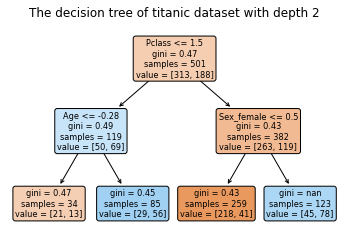

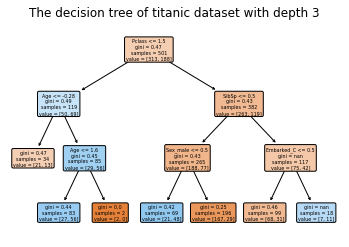

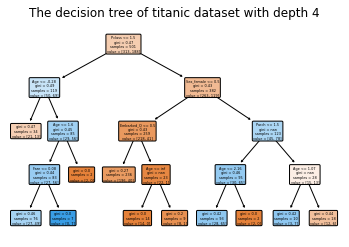

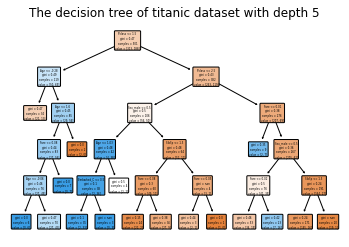

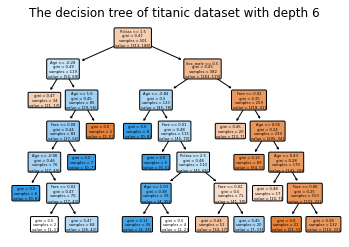

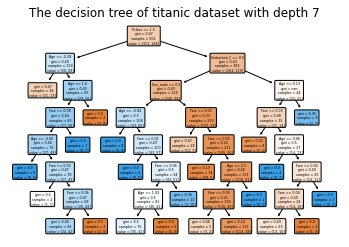

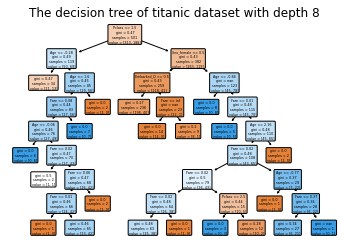

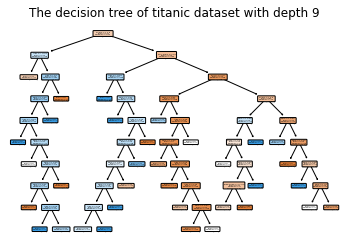

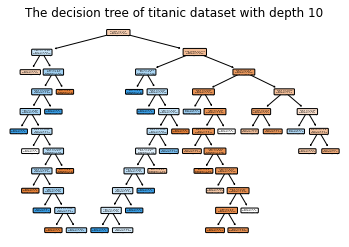

In [222]:
# fitting the training data to the decision tree
# with varying depths

# list of the depths
prune_depths = range(2, 11)

# list of training set accuracies
train_scores = []
# list of development set accuracies
dev_scores = []

# per each depth
for depth in prune_depths:

    # instanciating a new tree with the new maximum depth
    tree_model = DecisionTreeClassifier(max_depth=depth, random_state=0)
    # fitting the training set to the model
    tree_model.fit(X_train, y_train)
    # adding the training set accuracy to the list
    train_scores.append(tree_model.score(X_train, y_train))
    # adding the development set accuracy to the list
    dev_scores.append(tree_model.score(X_dev, y_dev))

    # plotting the tree
    fig = plt.figure()
    tree.plot_tree(
        tree_model,
        feature_names=X_train.columns,
        rounded=True,
        proportion=False,
        precision=2,
        filled=True,
    )
    plt.title("The decision tree of titanic dataset with depth {}".format(depth))

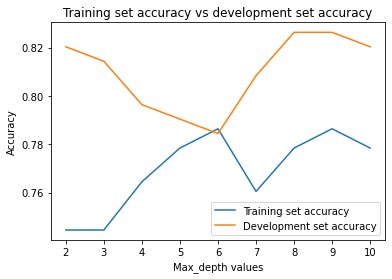

In [223]:
# plotting training set accuracy vs development set accuracy
fig, ax = plt.subplots()
ax.plot(prune_depths, train_scores)
ax.plot(prune_depths, dev_scores)
plt.xlabel("Max_depth values")
plt.ylabel("Accuracy")
plt.title("Training set accuracy vs development set accuracy")
plt.legend(["Training set accuracy", "Development set accuracy"])
ax.xaxis.set_ticks(prune_depths)
plt.show()



The lines in the plot exhibit fluctuations rather than a steady trend as the depth of the tree model increases. However, the training set's accuracy generally shows an upward trend, while the development set's accuracy tends to decline. This indicates that as the tree model becomes deeper, its complexity increases, leading to improved performance on the training set but deteriorating performance on the development set.

Up to a depth of 6, the model appears to be underfitting the data. Beyond a depth of 6, the model begins to overfit, as evidenced by the growing disparity between the accuracies of the training and development sets.

Based on the plot, the optimal tree depth is 6, where the accuracies of both the training and development sets are similar, suggesting the model achieves its best performance at this point.



In [224]:
# measuring the model's performance on test set
# using the depth 6
tree_model = DecisionTreeClassifier(max_depth=6, random_state=0)
# fitting the training set to the model
tree_model.fit(X_train, y_train)

print("Accuracy of the final model: {}".format(tree_model.score(X_test, y_test)))

Accuracy of the final model: 0.7937219730941704


While trying to fit the data to the Random Forest model, I realised that there are missing data points in 'Age' column.

That's why I removed the rows with missing ages from the dataset and splitted it into training, development and test set one more time.

In [225]:
x = titanic_df.iloc[:, 1:10]
# dependent variable (only 'Survived')
y = titanic_df.iloc[:, 0]

In [226]:
# splitting data to training and test set
X_train_full, X_test, y_train_full, y_test = train_test_split(
    x, y, test_size=0.25, random_state=0
)

# splitting training set to training set and development set
X_train, X_dev, y_train, y_dev = train_test_split(
    X_train_full, y_train_full, test_size=0.25, random_state=0
)

### Bagging

In [228]:
base = DecisionTreeClassifier(max_depth=6)
ensemble = BaggingClassifier(estimator=base, n_estimators=100, random_state=0)

base.fit(X_train,y_train)
ensemble.fit(X_train,y_train)

print("Accuracy base:",base.score(X_dev, y_dev))
print("Accuracy ensemble:",ensemble.score(X_dev, y_dev))

Accuracy base: 0.8083832335329342
Accuracy ensemble: 0.8323353293413174


### Random Forest

In [229]:
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("Accuracy base:",base.score(X_dev, y_dev))
print("Accuracy ensemble:",forest.score(X_dev, y_dev))

Accuracy base: 0.8083832335329342
Accuracy ensemble: 0.8143712574850299


In [230]:
feature_imp = pd.Series(forest.feature_importances_).sort_values(ascending=False)
feature_imp

1    0.261631
4    0.259079
6    0.149628
5    0.122424
0    0.075658
2    0.055980
3    0.039927
7    0.024609
8    0.011064
dtype: float64

'PClass' is the feature which contributes the most to predicting whether a passanger survived or not.

### Boosting

In [231]:
base = DecisionTreeClassifier(max_depth=6)
clf = AdaBoostClassifier(estimator= base, n_estimators=100, algorithm="SAMME", random_state=0)

base.fit(X_train,y_train)
clf.fit(X_train,y_train)

print("Accuracy base:",base.score(X_dev, y_dev))
print("Accuracy ensemble:",clf.score(X_dev, y_dev))

Accuracy base: 0.8083832335329342
Accuracy ensemble: 0.8143712574850299


### Tuning the best model

The bagging model with performed slightly better than the other two models, judging by aquiring the highest score on the development set (under the same circumstances).

Thus, the bagging model will be used for regularisation.

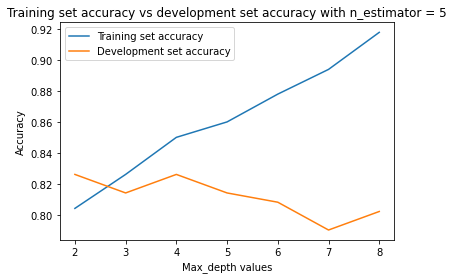

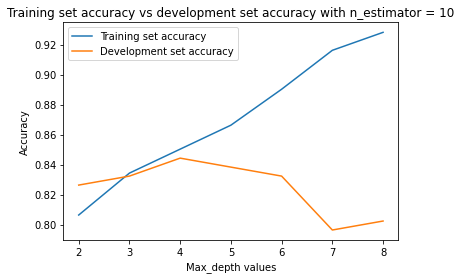

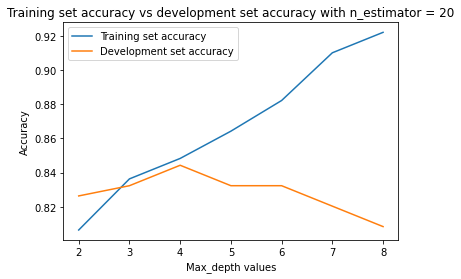

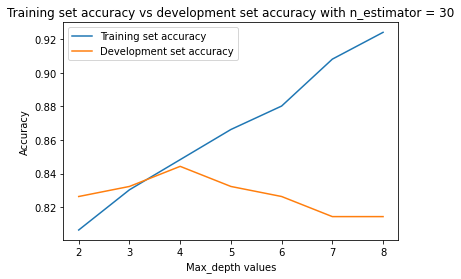

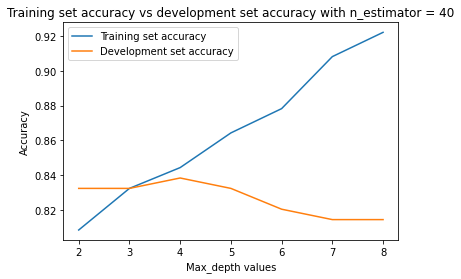

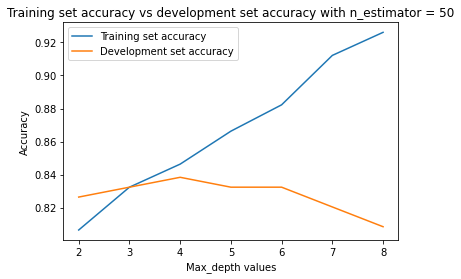

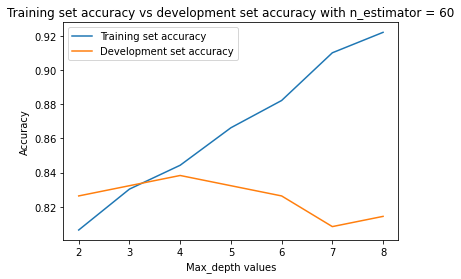

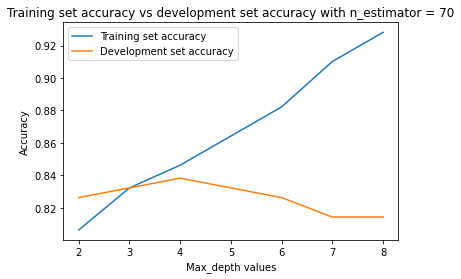

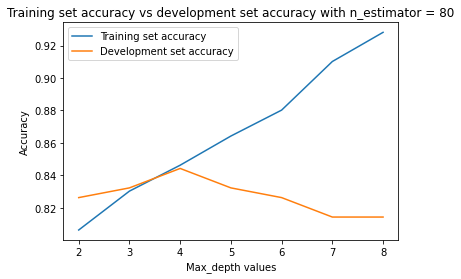

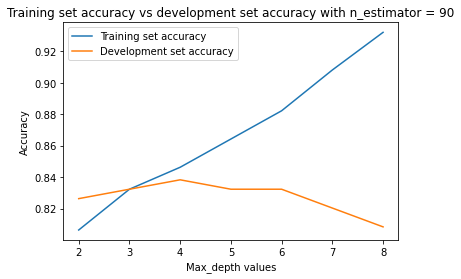

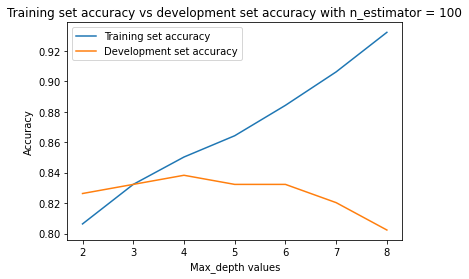

In [236]:
# A list of differennt values for number of estimators
n_estimators_list = [5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
# A list of depths from 2 to 8
prune_depths = range(2,9)

# Iterating through the number of estimators list
for est in n_estimators_list:
    # The list which keeps the model's scores on the development set
    dev_scores = []
    # The list which keeps the model's scores on the training set
    train_scores = []

    # Iterating through the list of depths
    for depth in prune_depths:
        
        # Instantiating the base estimator
        base = DecisionTreeClassifier(max_depth=depth)
        # Instantiating the classifier
        ensemble = BaggingClassifier(estimator=base, n_estimators=est, random_state=0)
        # Fitting the training set
        ensemble.fit(X_train,y_train)
        # Calculating the model's performance on training set
        # And adding it to the list
        train_scores.append(ensemble.score(X_train, y_train))
        # Calculating the model's performance on development set
        # And adding it to the list
        dev_scores.append(ensemble.score(X_dev, y_dev))

    # plotting training set accuracy vs development set accuracy
    fig, ax = plt.subplots()
    ax.plot(prune_depths, train_scores)
    ax.plot(prune_depths, dev_scores)
    plt.xlabel("Max_depth values")
    plt.ylabel("Accuracy")
    plt.title("Training set accuracy vs development set accuracy with n_estimator = {}".format(est))
    plt.legend(["Training set accuracy", "Development set accuracy"])
    ax.xaxis.set_ticks(prune_depths)
    plt.show()

The plots above prove that the best depth for the base estimators, is 3, since in most plots the two lines belonging to the training set accuracy and the development set accuracy collide around there. 

And this means from that point onward the models begin to overfit. 

Now for deciding on the number of estimators, the depth of the base estimator would be a constant 3, and this time the plots will be displayed, with only the number of estimators varying.

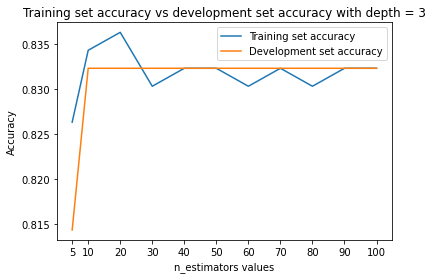

In [238]:
# The list with different number of estimators
n_estimators_list = [5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# The list which keeps the scores on development sets
dev_scores = []
# The list which keeps the scores on training sets
train_scores = []

# Iterating through the list of estimators
for est in n_estimators_list:
    # Instantiating the base estimator
    base = DecisionTreeClassifier(max_depth=3)
    # Instantiating the classifier
    ensemble = BaggingClassifier(estimator=base, n_estimators=est, random_state=0)
    # Fitting the training data to the classifier
    ensemble.fit(X_train,y_train)
    # Calculating the model's performance on the training set
    # And adding it to the list
    train_scores.append(ensemble.score(X_train, y_train))
    # Calculating the model's performance on the development set
    # And adding it to the list
    dev_scores.append(ensemble.score(X_dev, y_dev))

# plotting training set accuracy vs development set accuracy
fig, ax = plt.subplots()
ax.plot(n_estimators_list, train_scores)
ax.plot(n_estimators_list, dev_scores)
plt.xlabel("n_estimators values")
plt.ylabel("Accuracy")
plt.title("Training set accuracy vs development set accuracy with depth = 3")
plt.legend(["Training set accuracy", "Development set accuracy"])
ax.xaxis.set_ticks(n_estimators_list)
plt.show()

Since there are many points in the plot where the two lines belonging to the scores on training set and scores on development set are colliding, it would be better to find the first place where both lines collide.

In [260]:
# Rounding the score values
round_training_scores = [round(i,4) for i in train_scores]
round_dev_scores = [round(i,4) for i in dev_scores]

# Finding where the maximum scores were recorded on training and development set
print("Maximum training score: {}".format(max(round_training_scores)))
print("Maximum dev score: {}".format(max(round_dev_scores)))
print()

# Finding where the training score reached the development score
training_dev_collision_index = [i for i in range(len(round_training_scores)) if round_training_scores[i] == round_dev_scores[i]]

for i in training_dev_collision_index:
    print("Number of estimators with equal scores on training and development sets: {}".format(n_estimators_list[i]))

Maximum training score: 0.8363
Maximum dev score: 0.8323

Number of estimators with equal scores on training and development sets: 40
Number of estimators with equal scores on training and development sets: 50
Number of estimators with equal scores on training and development sets: 70
Number of estimators with equal scores on training and development sets: 90
Number of estimators with equal scores on training and development sets: 100


The final result of tuning the 'n_estimators' and 'max_depth' for the Bagging classifier:

- 'n_estimsators' = 40
- 'max_depth' = 3

## Accuracy of all models

In [261]:
base = DecisionTreeClassifier(max_depth=3)
ensemble = BaggingClassifier(estimator=base, n_estimators=40, random_state=0)
ensemble.fit(X_train,y_train)
print("Bagging model's training score: ", ensemble.score(X_train, y_train))
print("Bagging model's development score: ", ensemble.score(X_dev, y_dev))
print("Bagging model's test score: ", ensemble.score(X_test, y_test))

Boosting model's training score:  0.8323353293413174
Boosting model's development score:  0.8323353293413174
Boosting model's test score:  0.8161434977578476


In [265]:
forest = RandomForestClassifier(n_estimators=40, random_state=0)
forest.fit(X_train, y_train)

print("Random Forest model's training score: ", forest.score(X_train, y_train))
print("Random Forest model's development score: ", forest.score(X_dev, y_dev))
print("Random Forest model's test score: ", forest.score(X_test, y_test))

Random Forest model's training score:  0.9800399201596807
Random Forest model's development score:  0.8143712574850299
Random Forest model's test score:  0.8251121076233184


In [266]:
base = DecisionTreeClassifier(max_depth=3)
clf = AdaBoostClassifier(
    estimator=base, n_estimators=40, algorithm="SAMME", random_state=0
)

base.fit(X_train, y_train)
clf.fit(X_train, y_train)

print("Boosting model's training score: ", clf.score(X_train, y_train))
print("Boosting model's development score: ", clf.score(X_dev, y_dev))
print("Boosting model's test score: ", clf.score(X_test, y_test))

Boosting model's training score:  0.9001996007984032
Boosting model's development score:  0.7904191616766467
Boosting model's test score:  0.8161434977578476


Overall, the Random Forest model demonstrates better performance compared to the other two models.

However, it's important to note that the Random Forest model exhibits significant overfitting, as evidenced by the large gap between the development score and the training score.

The Boosting classifier shows a similar pattern of overfitting.

On the other hand, while the Bagging classifier performs slightly worse on the test set compared to the Random Forest model, the alignment between the training and development scores is promising. This indicates that the model is neither underfitting nor overfitting the data, supporting its results on the test set.


The final result of tuning the 'n_estimators' and 'max_depth' for the best classifier:

- 'n_estimsators' = 40
- 'max_depth' = 3